pip install yfinance

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: yfinance in c:\users\kaith\appdata\local\programs\python\python310\lib\site-packages (0.2.61)
  Attempting uninstall: websockets
    Found existing installation: websockets 10.4
    Uninstalling websockets-10.4:
      Successfully uninstalled websockets-10.4



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyppeteer 2.0.0 requires websockets<11.0,>=10.0, but you have websockets 15.0.1 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
import yfinance as yf
import datetime

start = '2015-03-01'
end = datetime.datetime.now().strftime('%Y-%m-%d')
stock = 'AAPL'

df = yf.download(stock, start=start, end=end)
df.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-02,28.791611,29.057023,28.615414,28.827297,192386800
2015-03-03,28.851839,28.887526,28.568583,28.762626,151265200
2015-03-04,28.668947,28.896444,28.619883,28.793850,126665200
2015-03-05,28.193882,28.715784,28.048909,28.677868,226068400
2015-03-06,28.236259,28.854066,28.160428,28.637722,291368400


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-06-02,201.699997,202.130005,200.119995,200.279999,35423300
2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600
2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000
2025-06-05,200.630005,204.750000,200.149994,203.500000,55126100
2025-06-06,203.919998,205.699997,202.050003,203.000000,46539200


In [5]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-02,28.791611,29.057023,28.615414,28.827297,192386800
1,2015-03-03,28.851839,28.887526,28.568583,28.762626,151265200
2,2015-03-04,28.668947,28.896444,28.619883,28.793850,126665200
3,2015-03-05,28.193882,28.715784,28.048909,28.677868,226068400
4,2015-03-06,28.236259,28.854066,28.160428,28.637722,291368400


In [6]:
df

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-02,28.791611,29.057023,28.615414,28.827297,192386800
1,2015-03-03,28.851839,28.887526,28.568583,28.762626,151265200
2,2015-03-04,28.668947,28.896444,28.619883,28.793850,126665200
3,2015-03-05,28.193882,28.715784,28.048909,28.677868,226068400
4,2015-03-06,28.236259,28.854066,28.160428,28.637722,291368400
...,...,...,...,...,...,...
2579,2025-06-02,201.699997,202.130005,200.119995,200.279999,35423300
2580,2025-06-03,203.270004,203.770004,200.960007,201.350006,46381600
2581,2025-06-04,202.820007,206.240005,202.100006,202.910004,43604000


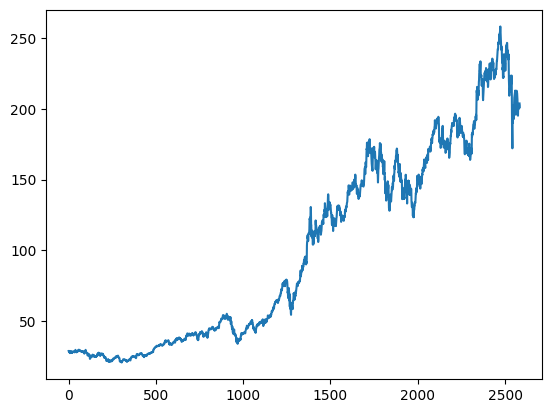

In [7]:
import matplotlib.pyplot as plt
plt.plot(df["Close"])

In [8]:
ma_100_days = df["Close"].rolling(100).mean().dropna()
ma_100_days

Ticker,AAPL
99,28.447388
100,28.439788
101,28.430109
102,28.418383
103,28.412775
...,...
2579,218.472684
2580,218.089113
2581,217.696154
2582,217.339653


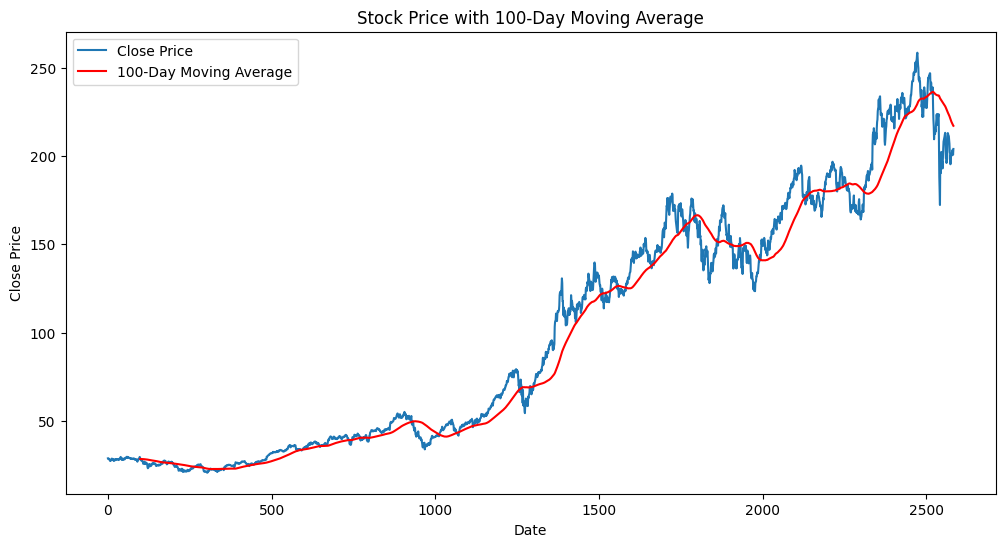

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.plot(ma_100_days, 'r', label="100-Day Moving Average")
plt.title("Stock Price with 100-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [10]:
ma_200_days = df.Close.rolling(200).mean()
ma_200_days

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2579,225.049983
2580,224.961616
2581,224.856052
2582,224.732911


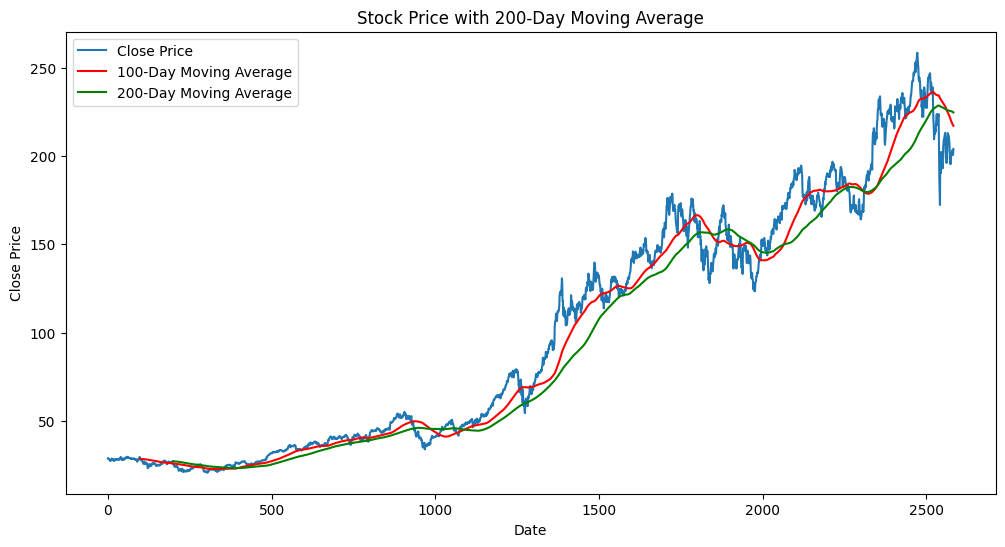

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df["Close"], label="Close Price")
plt.plot(ma_100_days, 'r', label="100-Day Moving Average")
plt.plot(ma_200_days, 'g', label="200-Day Moving Average")
plt.title("Stock Price with 200-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [12]:
df.shape

(2584, 6)

In [13]:
#spliting data into training and testing

data_train = pd.DataFrame(df.Close[0: int(len(df)*0.70)])
data_test = pd.DataFrame(df.Close[int(len(df)*0.70): len(df)])
print(data_train.shape)
print(data_test.shape)

(1808, 1)
(776, 1)


In [14]:
data_train.head()

Ticker,AAPL
0,28.791611
1,28.851839
2,28.668947
3,28.193882
4,28.236259


In [15]:
data_test.head()

Ticker,AAPL
1808,163.158798
1809,154.068237
1810,154.796555
1811,149.658966
1812,152.070267


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_train_array = scaler.fit_transform(data_train)
data_train_array
data_train_array.shape

(1808, 1)

In [18]:
x = []
y = []

for i in range(100, data_train_array.shape[0]):
    x.append(data_train_array[i-100:i])
    y.append(data_train_array[i,0])
x

[array([[0.05154585],
        [0.05192705],
        [0.05076949],
        [0.04776271],
        [0.04803093],
        [0.04879318],
        [0.0450806 ],
        [0.0418762 ],
        [0.04499585],
        [0.04378192],
        [0.04570171],
        [0.04865202],
        [0.05067066],
        [0.04930133],
        [0.04704274],
        [0.048892  ],
        [0.04815794],
        [0.04348545],
        [0.04469947],
        [0.04330194],
        [0.04770626],
        [0.04496765],
        [0.04471359],
        [0.04622406],
        [0.04908964],
        [0.04719806],
        [0.04661926],
        [0.04797439],
        [0.0487367 ],
        [0.04838383],
        [0.04760748],
        [0.04828498],
        [0.0474239 ],
        [0.04541941],
        [0.04944253],
        [0.04846851],
        [0.0508824 ],
        [0.05236464],
        [0.05322571],
        [0.05657129],
        [0.053621  ],
        [0.05091068],
        [0.04598403],
        [0.05134824],
        [0.05099533],
        [0

In [19]:
import numpy as np
x, y = np.array(x), np.array(y)

In [20]:
# ML model

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input

In [22]:
model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x, y, epochs=50, batch_size=32,verbose =1)

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 18s 173ms/step - loss: 0.0793
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - loss: 0.0100
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 209ms/step - loss: 0.0070
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - loss: 0.0054
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - loss: 0.0059
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 222ms/step - loss: 0.0054
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 12s 220ms/step - loss: 0.0046
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - loss: 0.0041
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 239ms/step - loss: 0.0046
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - loss: 0.0061
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 231ms/step - loss: 0.0040
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - loss: 0.0035
Epoch 13/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - loss: 0.0041
Epoch 14/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 14s 254ms/step - loss: 0.0039
Epoch 15/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 13s 

In [25]:
model.summary()
data_test.head()
model.save('keras_model.keras')
data_train.tail()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

Ticker,AAPL
1803,153.871704
1804,160.819855
1805,154.933060
1806,155.237717
1807,156.731537


In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test.head()

Ticker,AAPL
0,171.333359
1,176.132980
2,172.491562
3,171.107635
4,175.985748


In [28]:
data_test_array  =  scaler.fit_transform(data_test)
data_test_array
data_test_array.shape

(876, 1)

In [29]:
x = []
y = []

for i in range(100, data_test_array.shape[0]):
    x.append(data_test_array[i-100:i])
    y.append(data_test_array[i,0])
x, y = np.array(x), np.array(y)
print(x.shape)
print(y.shape)

(776, 100, 1)
(776,)


In [30]:
#making predictions
y_predict = model.predict(x)
y_predict.shape

25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step


(776, 1)

In [31]:
scale =1/scaler.scale_
print("y_predict:", y_predict)
print("y_predict shape:", y_predict.shape)

y_predict: [[0.29075497]
 [0.28639907]
 [0.28280768]
 [0.27977315]
 [0.27666548]
 [0.27306044]
 [0.26825103]
 [0.26184928]
 [0.2542639 ]
 [0.24529065]
 [0.23531258]
 [0.22532573]
 [0.21594034]
 [0.20670983]
 [0.19761953]
 [0.18877886]
 [0.18032277]
 [0.17247586]
 [0.16560325]
 [0.16001296]
 [0.15589094]
 [0.15332232]
 [0.15198737]
 [0.15154925]
 [0.15189463]
 [0.15289512]
 [0.15432858]
 [0.15587772]
 [0.15707614]
 [0.15754116]
 [0.15691432]
 [0.15504631]
 [0.15198237]
 [0.14789042]
 [0.14302936]
 [0.13779053]
 [0.13268298]
 [0.12813795]
 [0.12431174]
 [0.1212588 ]
 [0.11888759]
 [0.11711566]
 [0.11592824]
 [0.11533374]
 [0.11541657]
 [0.11618243]
 [0.11763607]
 [0.11966255]
 [0.12215988]
 [0.12509167]
 [0.1284486 ]
 [0.13216674]
 [0.13619083]
 [0.1404879 ]
 [0.14504288]
 [0.14981838]
 [0.15474336]
 [0.15967453]
 [0.16454643]
 [0.16930558]
 [0.17401795]
 [0.17909335]
 [0.18461278]
 [0.19089587]
 [0.1981052 ]
 [0.20638727]
 [0.21561542]
 [0.22552352]
 [0.23607567]
 [0.24706037]
 [0.25827

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

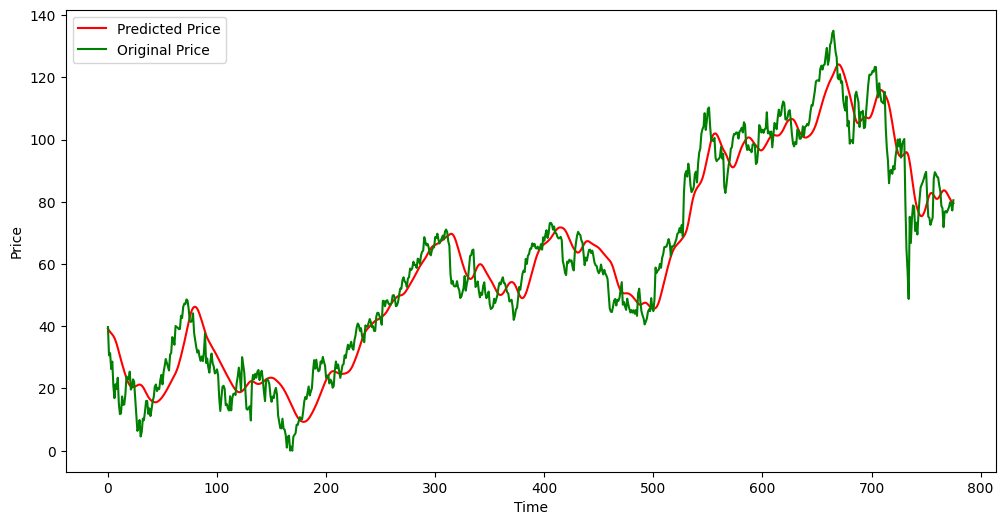

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()